In [1]:
import numpy as np
from scipy import stats
import scipy.linalg as lin
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import time

import core
import wocca
import gradient
import ring
import visualize as vis
import grid_samples as gsmp
import icons

from ds1_leipzig import *

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()


In [798]:
import importlib
importlib.reload(vis)

<module 'visualize' from '/data/liyichao/code/microstates/wocca_project_code/visualize.py'>

In [2]:
toy_pickle_prefix = "../wocca_project_pickles/toy_"

pickle_prefix = "../wocca_project_pickles/ds1_leipzig_"
bounds_fn = pickle_prefix + "bounds.pickle"
wocca_fn = pickle_prefix + "wocca.pickle"
affinity_fn = pickle_prefix + "affinity.pickle"
microstate_fn = pickle_prefix + "microstate.pickle"

ages = np.array([int(st[ : 2]) for st in get_age(subj_ids + subj_ids_ext)])
age_labels = np.array(ages > 50, dtype = int)

### Reload necessary data

In [3]:
# Microstate
with open(microstate_fn, mode = "rb") as FIn:
    msc = pickle.load(FIn)[0]

# Traveling wave
with open(wocca_fn, mode = "rb") as FIn:
    ws = pickle.load(FIn)[1]
n_comps, n_v = ws.shape

### Visualize microstates and traveling waves of alpha EEG

In [4]:
# %% Visualization definitions

fig_path = "../wocca_project_figs/explore_toy/"
fig_supp_path = "../wocca_project_figs/supplementary/"
ms_comp_labels = ["A", "B", "C", "D"]

default_color = "#607280"
highlight_color = "#78AAD3"
gfp_curve_color = "#4A86C8"
gfp_choice_color = "#FF6B5C"
cpca_color = "#FF6000"
vsvd_color = "#57C83C"
wocca_color = "#4A86C8"
wocca_shade_color = "#ECF2F9"
long_wave_color = "#49ADFF"
short_wave_color = "#FF6B5C"
scree_accumulated_color = "#800E20"
ignore_color = "#808080"

In [5]:
# %% Load EEG data for visualization

tmp_seg_ms = iter_cms(0)[0]
tmp_seg_tw = iter_twms(0)[0]

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:123: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:123: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:123: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:123: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
[-0.01278266 -0.89338123 -0.00366226  0.05785163]


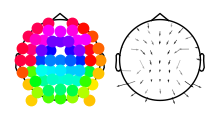

In [13]:
# %% Choose a good example

tmp_ws = np.zeros([len(tmp_seg_tw.data), 4])
for i in range(len(tmp_seg_tw.data)):
    for j in range(4):
        tmp_ws[i, j] = wocca.w(tmp_seg_tw.data[i], ws[j])
k_max = np.argmax(np.abs(tmp_ws[ : , 1]))

fig = plt.figure(figsize = [2, 1], dpi = 100)
ax = plt.axes([0, 0, 0.5, 1])
vis.disp_phasemap(info, tmp_seg_tw.data[k_max], markersize = 15)
ax = plt.axes([0.5, 0, 0.5, 1])
vis.disp_quiver_map(info, tmp_seg_tw.data[k_max], show_r2 = True, scale = 100, width = 0.006, sensors = False)

print(tmp_ws[k_max])

41874 42063


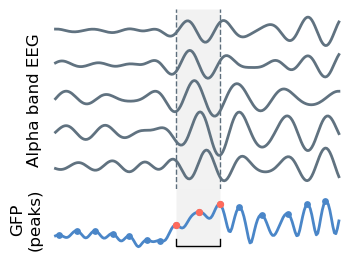

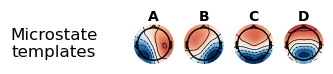

In [276]:
# %% Draw EEG segment example

ch_names = ["AFz", "Fz", "Cz", "Pz", "Oz"]
ch_inds = [core.chname2ind(info, st) for st in ch_names]

sl, sr = tmp_seg_tw.peaks[k_max - 1] - 80, tmp_seg_tw.peaks[k_max + 1] + 80
print(sl, sr)

fx, fy = 3.6, 2.6
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.5 / fx, 0.7 / fy, 3 / fx, 1.8 / fy])
for i in range(5):
    plt.plot(np.arange(sl, sr), tmp_seg_ms.data[sl : sr, ch_inds[i]] - 1.5e-5 * i, lw = 2, c = default_color)
plt.axvline(x = tmp_seg_tw.peaks[k_max - 1], lw = 1, c = default_color, ls = "--", zorder = -10)
plt.axvline(x = tmp_seg_tw.peaks[k_max + 1], lw = 1, c = default_color, ls = "--", zorder = -10)
axh = plt.axis(xmin = sl - 5, xmax = sr + 5)
plt.fill_betweenx([axh[2], axh[3]], [tmp_seg_tw.peaks[k_max - 1]] * 2, [tmp_seg_tw.peaks[k_max + 1]] * 2, \
                  fc = vis.append_alpha("#000000", 0.05), ec = "#00000000", zorder = -10)
plt.axis(axh)
plt.ylabel("Alpha band EEG", size = "large")
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

ax = plt.axes([0.5 / fx, 0.1 / fy, 3 / fx, 0.6 / fy])
plt.plot(np.arange(sl, sr), tmp_seg_ms.gfp[sl : sr], lw = 2, c = gfp_curve_color)
peak_pos = tmp_seg_ms.peaks[np.searchsorted(tmp_seg_ms.peaks, sl) : np.searchsorted(tmp_seg_ms.peaks, sr)]
plt.scatter(peak_pos, tmp_seg_ms.gfp[peak_pos], s = 15, c = gfp_curve_color)
plt.scatter(tmp_seg_ms.peaks[(k_max - 1) : (k_max + 2)], tmp_seg_ms.gfp[tmp_seg_ms.peaks[(k_max - 1) : (k_max + 2)]], s = 18, c = gfp_choice_color, zorder = 10)
axh = plt.axis(xmin = sl - 5, xmax = sr + 5)
tmp_y0 = axh[2] + (axh[3] - axh[2]) / 0.5 * 0.03
tmp_y1 = tmp_y0 + (axh[3] - axh[2]) / 0.5 * 0.07
plt.plot([tmp_seg_ms.peaks[k_max - 1]] * 2 + [tmp_seg_ms.peaks[k_max + 1]] * 2, [tmp_y1, tmp_y0, tmp_y0, tmp_y1], lw = 1, c = "#000000")
plt.fill_betweenx([axh[2], axh[3] + (axh[3] - axh[2]) / 0.5 * 0.1], [tmp_seg_tw.peaks[k_max - 1]] * 2, [tmp_seg_tw.peaks[k_max + 1]] * 2, \
                  fc = vis.append_alpha("#000000", 0.05), ec = "#00000000", zorder = -10)
plt.axis((axh[0], axh[1], axh[2], axh[3] + (axh[3] - axh[2]) / 0.5 * 0.1))
plt.ylabel("GFP\n(peaks)", size = "large")
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig(fig_path + "eeg_segment_selection.svg", format = "svg")

# Microstate centers (with label on the left and without channel locations)
fx, fy = 3.6, 0.7
fig = plt.figure(figsize = [fx, fy], dpi = 100)
for i in range(4):
    ax = plt.axes([(1.4 + 0.5 * i) / fx, 0.1 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_topomap(info, msc[i], cmap = "RdBu_r", vmin = -topomap_vmax, vmax = topomap_vmax, colorbar = False, sensors = False)
    fig.text((1.6 + 0.5 * i) / fx, 0.5 / fy, ms_comp_labels[i], ha = "center", va = "bottom", size = "medium", fontweight = "bold")
fig.text(0.6 / fx, 0.3 / fy, "Microstate\ntemplates", ha = "center", va = "center", size = "large")

fig.savefig(fig_path + "eeg_microstate_diagram.svg", format = "svg")

41954 41983


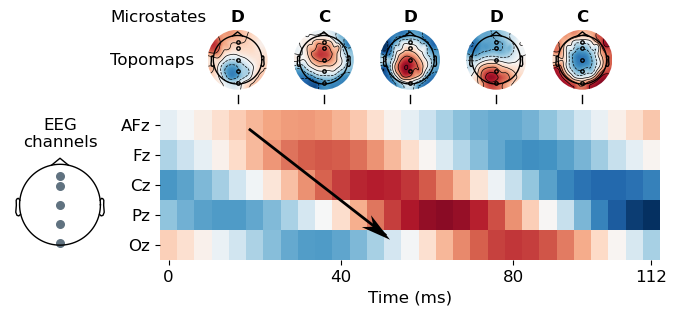

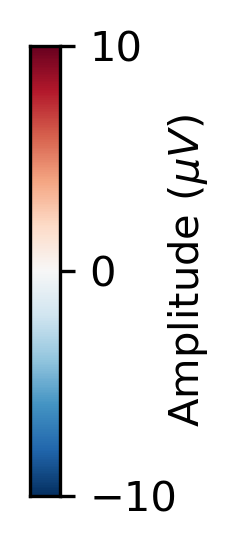

In [260]:
# %% Draw traveling wave amplitude shift

# Draw waveforms
sl, sr = tmp_seg_tw.peaks[k_max - 1], tmp_seg_tw.peaks[k_max + 1]
print(sl, sr)
tmp = tmp_seg_ms.data[sl : sr, ch_inds]
tmp_labels = np.argmax(core.topomap_affinity(tmp_seg_ms.data[sl : sr], msc, True, False), axis = 1)
vmax = 1e-5

fx, fy = 6.6, 3.2
fig = plt.figure(figsize = [fx, fy])

ax = plt.axes([0, 0.55 / fy, 1 / fx, 1 / fy])
vis.disp_topomap(info, np.zeros([n_v]), cmap = vis.whites_cmap, colorbar = False, sensors = False)
tmp_pos = vis.get_phys_pos(info)
plt.scatter(tmp_pos[ch_inds, 0], tmp_pos[ch_inds, 1], s = 30, marker = "o", color = default_color)

ax = plt.axes([1.5 / fx, 0.5 / fy, 5 / fx, 1.5 / fy])
plt.pcolormesh(np.arange(sr - sl), np.arange(5), tmp.T[ : : -1], shading = "nearest", cmap = "RdBu_r", vmin = -vmax, vmax = vmax)
ax.set_frame_on(False)
ax.set_yticks(np.arange(5))
ax.set_yticklabels(ch_names[ : : -1])
ax.set_xticks([0, 10, 20, sr - sl - 1])
ax.set_xticklabels(["{:}".format(int(i / sfreq * 1000)) for i in ax.get_xticks()])
ax.tick_params(labelsize = "large")
plt.xlabel("Time (ms)", size = "large")

ax = plt.axes([2.2 / fx, 0.5 / fy, 1.8 / fx, 1.5 / fy])
plt.axis([0, 1.8, 0, 1.5])
vis.no_axes(ax)
plt.plot([0.2, 1.55], [1.3, 0.25], lw = 2, c = "#000000")
plt.arrow(0.2, 1.3, 1.4, -1.1, length_includes_head = True, width = 0, head_length = 0.3, head_width = 0.15, \
          head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)

for i in range(5):
    k = i * 5 + 4
    xpos = 1.5 + (k + 0.5) * 5 / (sr - sl)
    ax = plt.axes([(xpos - 0.3) / fx, 2.2 / fy, 0.6 / fx, 0.6 / fy])
    vis.disp_topomap(info, tmp_seg_ms.data[sl + k], cmap = "RdBu_r", vmin = -vmax, vmax = vmax, colorbar = False, sensors = False)
    plt.scatter(tmp_pos[ch_inds, 0], tmp_pos[ch_inds, 1], s = 6, fc = "#00000000", ec = "#000000", lw = 1)
    fig.text(xpos / fx, 2.85 / fy, ms_comp_labels[tmp_labels[k]], ha = "center", va = "bottom", size = "large", fontweight = "bold")
    
    ax = plt.axes([(xpos - 0.1) / fx, 2 / fy, 0.2 / fx, 0.2 / fy])
    plt.axis([0, 0.2, 0, 0.2])
    vis.no_axes(ax)
    plt.plot([0.1, 0.1], [0.07, 0.15], lw = 1, c = "#000000")

fig.text(0.5 / fx, 1.6 / fy, "EEG\nchannels", ha = "center", va = "bottom", size = "large")
fig.text(1 / fx, 2.5 / fy, "Topomaps", ha = "left", va = "center", size = "large")
fig.text(1 / fx, 2.85 / fy, "Microstates", ha = "left", va = "bottom", size = "large")

fig.savefig(fig_path + "eeg_waveform.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.7, 1.7], bs = [0.1, 1.5], ticks = np.array([-vmax, 0, vmax]), vmin = -vmax, vmax = vmax, \
                   tick_labels = ["-10".replace("-", vis.minus_sign), "0", "10"], caption = "Amplitude ($\mu V$)")
fig.savefig(fig_path + "eeg_waveform_colorbar.svg", format = "svg")

### Grid data hilbert transform and phasemaps

In [6]:
# %% Definitions

# Define grid system
n_grid = 6
n_vec, grids, gshape, grid_adj, g_fun = gsmp.set_grids(n_grid)

# Generate oscillation time series
map0, map2 = gsmp.translational(grids, np.array([np.pi / 2, 0]))
map1 = gsmp.rotational(grids, np.array([[0, 0]]), 1).squeeze()
map0, map1, map2 = [tmp / np.sqrt(wocca.norm(tmp)) for tmp in [map0, map1, map2]]

maps = np.zeros([201, n_vec], dtype = complex)
for i in range(101):
    maps[i] = ring.geodesic_interpolate(map0, map1, i / 100)
for i in range(1, 101):
    maps[i + 100] = ring.geodesic_interpolate(map1, np.conj(map0), i / 100)

omega = np.pi * 2 / 50
for i in range(201):
    maps[i] *= np.exp(1j * omega * i)

gfps, peaks = core.get_gfp_peaks(maps.real, 500)

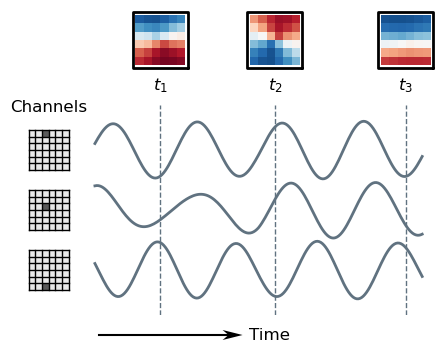

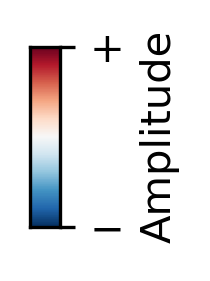

In [7]:
# %% Visualize waveforms

# Select channels
sel_squares = [17, 15, 12]
sel_times = [40, 110, 190]

# Draw
fx, fy = 4.5, 3.55
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.8 / fx, 0.4 / fy, 3.6 / fx, 2.1 / fy])
for i in range(len(sel_squares)):
    plt.plot(np.arange(201), maps[ : , sel_squares[i]].real - 0.4 * i, c = default_color, lw = 2)
for i in range(len(sel_times)):
    plt.axvline(x = sel_times[i], lw = 1, c = default_color, ls = "--", zorder = -10)
plt.axis([-10, 210, -1.1, 0.3])
vis.no_axes(ax)

ax = plt.axes([0.8 / fx, 0.05 / fy, 3.6 / fx, 0.3 / fy])
plt.axis([0, 3.6, 0, 0.3])
vis.no_axes(ax)
plt.plot([0.2, 1.5], [0.15, 0.15], lw = 1.5, c = "#000000")
plt.arrow(1.5 - 0.2 * 0.3, 0.15, 0.2, 0, length_includes_head = True, width = 0, head_length = 0.2, head_width = 0.1, \
          head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
plt.text(1.7, 0.15, "Time", ha = "left", va = "center", size = "large")

for i in range(len(sel_squares)):
    ax = plt.axes([0.3 / fx, (0.2 + 1.65 - i * 0.6) / fy, 0.4 / fx, 0.4 / fy])
    vis.no_axes(ax)
    tmp = np.zeros([36])
    tmp[sel_squares[i]] = 1
    gsmp.disp_grid_topomap(grids, gshape, tmp, vmin = -0.3, vmax = 1.5, cmap = "Greys")
    for j in np.linspace(-0.5, 0.5, 7, True):
        plt.plot([-0.5, 0.5], [j, j], lw = 1, c = "#000000", clip_on = False)
        plt.plot([j, j], [-0.5, 0.5], lw = 1, c = "#000000", clip_on = False)
    plt.axis([-0.5, 0.5, -0.5, 0.5])
fig.text(0.5 / fx, 2.4 / fy, "Channels", ha = "center", va = "bottom", size = "large")

for i in range(len(sel_times)):
    ax = plt.axes([(0.5 + 3.6 / 220 * (sel_times[i] + 10)) / fx, 2.85 / fy, 0.6 / fx, 0.6 / fy])
    vis.no_axes(ax)
    gsmp.disp_grid_topomap(grids, gshape, maps[sel_times[i]].real, vmin = -0.2, vmax = 0.2)
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text((0.8 + 3.6 / 220 * (sel_times[i] + 10)) / fx, 2.6 / fy, r"$t_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_waveform.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.6, 0.8], bs = [0.1, 0.6], ticks = np.array([-1, 1]), vmin = -1, vmax = 1, \
                   tick_labels = [vis.minus_sign, "+"], caption = "Amplitude")
fig.savefig(fig_path + "toy_waveform_colorbar.svg", format = "svg")

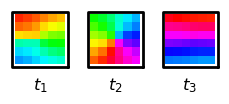

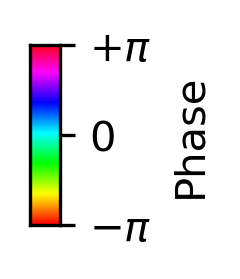

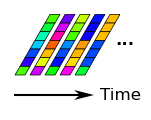

In [300]:
# %% Draw phasemap example and diagram

# Phasemap samples
fx, fy = 2.3, 1
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([(0.1 + 0.75 * i) / fx, 0.3 / fy, 0.6 / fx, 0.6 / fy])
    gsmp.disp_grid_phasemap(grids, gshape, maps[sel_times[i]])
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text((0.4 + 0.75 * i) / fx, 0.05 / fy, r"$t_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "phasemap_samples.svg", format = "svg")

# Colorbar
fig = vis.colorbar("hsv", fs = [0.7, 0.8], bs = [0.1, 0.6], ticks = np.array([0, 0.5, 1]), vmin = 0, vmax = 1, \
                   tick_labels = [r"$-\pi$", r"$0$", r"$+\pi$"], caption = "Phase")
fig.savefig(fig_path + "phasemap_colorbar.svg", format = "svg")

# Vectorized phasemap matrix
tmp_angle = np.pi / 3
poly_single = np.array([[0, 0], [1, 0], [1 + np.cos(tmp_angle), np.sin(tmp_angle)], [np.cos(tmp_angle), np.sin(tmp_angle)]])

fx, fy = 1.3, 1.05
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0.35 / fy, 1.1 / fx, 0.7 / fy])
plt.axis([-0.5, 10.5, -0.5, 6.5])
vis.no_axes(ax)
for i in range(5):
    for j in range(7):
        poly_coord = poly_single + [i * 1.5 + np.cos(tmp_angle) * (6 - j), np.sin(tmp_angle) * (6 - j)]
        poly = mpl.patches.Polygon(poly_coord, ec = "#000000", lw = 0.5, \
                                   fc = mpl.colormaps.get_cmap("hsv")(np.angle(maps[i * 25, (j + 1) * 5]) / (np.pi * 2) + 0.5))
        ax.add_patch(poly)

ax = plt.axes([0, 0.05 / fy, 1.3 / fx, 0.3 / fy])
plt.axis([0, 1.3, 0, 0.3])
vis.no_axes(ax)
plt.plot([0.05, 0.7], [0.15, 0.15], lw = 1.5, c = "#000000")
plt.arrow(0.7 - 0.2 * 0.3, 0.15, 0.2, 0, length_includes_head = True, width = 0, head_length = 0.2, head_width = 0.1, \
          head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
plt.text(0.9, 0.15, "Time", ha = "left", va = "center", size = "large")
fig.text(1.05 / fx, 0.75 / fy, "...", ha = "left", va = "center", size = "large", fontweight = "bold")

fig.savefig(fig_path + "phasemap_vectors_diagram.svg", format = "svg")

### Grid data phase gradients

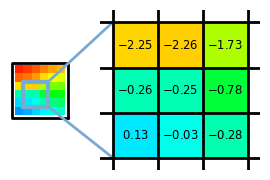

In [304]:
# %% Draw zoomed-in phase values

fx, fy = 2.8, 1.8
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.1 / fx, 0.6 / fy, 0.6 / fx, 0.6 / fy])
vis.no_axes(ax)
gsmp.disp_grid_phasemap(grids, gshape, maps[sel_times[0]])
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])

tmp_grid = np.linspace(-0.5, 0.5, 7, True)
rect = mpl.patches.Rectangle([tmp_grid[1]] * 2, tmp_grid[4] - tmp_grid[1], tmp_grid[4] - tmp_grid[1], \
                             lw = 3, ec = highlight_color, fc = "#00000000", zorder = 10)
ax.add_patch(rect)
plt.plot([tmp_grid[4], (1.125 - 0.4) * 2], [tmp_grid[4], (1.575 - 0.9) * 2], clip_on = False, c = highlight_color, lw = 2)
plt.plot([tmp_grid[4], (1.125 - 0.4) * 2], [tmp_grid[1], (0.225 - 0.9) * 2], clip_on = False, c = highlight_color, lw = 2)

ax = plt.axes([1 / fx, 0.1 / fy, 1.6 / fx, 1.6 / fy])
plt.axis([0, 1.6, 0, 1.6])
vis.no_axes(ax)
for i in range(4):
    plt.plot([0, 1.6], [0.125 + i * 0.45] * 2, c = "#000000", lw = 2, zorder = 10)
    plt.plot([0.125 + i * 0.45] * 2, [0, 1.6], c = "#000000", lw = 2, zorder = 10)
for i in range(3):
    for j in range(3):
        tmp_angle = np.angle(maps[sel_times[0], (i + 1) * 6 + j + 1])
        tmp_color = mpl.colormaps.get_cmap("hsv")(tmp_angle / (np.pi * 2) + 0.5)
        rect = mpl.patches.Rectangle([i * 0.45 + 0.125, j * 0.45 + 0.125], 0.45, 0.45, lw = 0, ec = "#00000000", fc = tmp_color, zorder = 0)
        ax.add_patch(rect)
        plt.text(i * 0.45 + 0.35, j * 0.45 + 0.35, "${:.2f}$".format(tmp_angle).replace("-", vis.minus_sign), zorder = 10, \
                 ha = "center", va = "center", size = "small", color = "#000000" if vis.luminance(tmp_color) > 0.5 else "#FFFFFF")

fig.savefig(fig_path + "phasemap_zoom_in.svg", format = "svg")

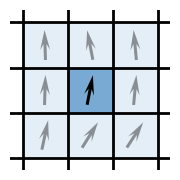

In [312]:
# %% Draw zoomed-in phase gradients

fx, fy = 1.8, 1.8
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.1 / fx, 0.1 / fy, 1.6 / fx, 1.6 / fy])
plt.axis([0, 1.6, 0, 1.6])
vis.no_axes(ax)
for i in range(4):
    plt.plot([0, 1.6], [0.125 + i * 0.45] * 2, c = "#000000", lw = 2, zorder = 10)
    plt.plot([0.125 + i * 0.45] * 2, [0, 1.6], c = "#000000", lw = 2, zorder = 10)

tmp_g = g_fun(maps[sel_times[0]])
for i in range(3):
    for j in range(3):
        tmp_arrow = tmp_g[(i + 1) * 6 + j + 1] / 7100
        tmp_arrow *= 1 + 0.3 / np.sqrt((tmp_arrow ** 2).sum())
        rect = mpl.patches.Rectangle([i * 0.45 + 0.125, j * 0.45 + 0.125], 0.45, 0.45, lw = 0, ec = "#00000000", \
                                     fc = vis.append_alpha(highlight_color, 1 if (i == 1) and (j == 1) else 0.2), zorder = 0)
        ax.add_patch(rect)
        plt.arrow(i * 0.45 + 0.35 - tmp_arrow[0] / 2, j * 0.45 + 0.35 - tmp_arrow[1] / 2, tmp_arrow[0], tmp_arrow[1], length_includes_head = True, \
                  width = 0.03, head_width = 0.1, head_length = 0.2, head_starts_at_zero = False, overhang = 0.3, \
                  fc = vis.append_alpha("#000000", 1 if (i == 1) and (j == 1) else 0.4), ec = "#00000000", lw = 0, zorder = 10)

fig.savefig(fig_path + "phase_gradient_zoom_in.svg", format = "svg")

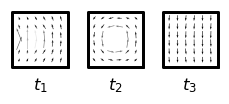

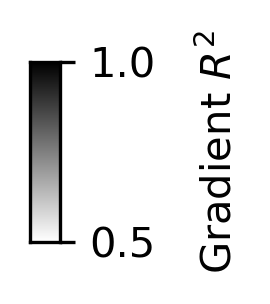

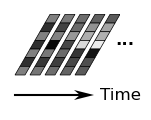

In [327]:
# %% Draw phase gradient example and diagram

# Phase gradient samples
fx, fy = 2.3, 1
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([(0.1 + 0.75 * i) / fx, 0.3 / fy, 0.6 / fx, 0.6 / fy])
    gsmp.disp_grid_gradient(grids, grid_adj, maps[sel_times[i]], show_r2 = True, scale = 30, width = 0.01)
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text((0.4 + 0.75 * i) / fx, 0.05 / fy, r"$t_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "phase_gradient_samples.svg", format = "svg")

# Colorbar
fig = vis.colorbar(vis.linear_greys_cmap, fs = [0.8, 0.9], bs = [0.1, 0.6], ticks = np.array([0.5, 1]), vmin = 0.5, vmax = 1, \
                   tick_labels = ["0.5", "1.0"], caption = r"Gradient $R^2$")
fig.savefig(fig_path + "phase_gradient_colorbar.svg", format = "svg")

# Vectorized phase gradient matrix
tmp_angle = np.pi / 3
poly_single = np.array([[0, 0], [1, 0], [1 + np.cos(tmp_angle), np.sin(tmp_angle)], [np.cos(tmp_angle), np.sin(tmp_angle)]])

fx, fy = 1.3, 1.05
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0.35 / fy, 1.1 / fx, 0.7 / fy])
plt.axis([-0.5, 10.5, -0.5, 6.5])
vis.no_axes(ax)
for i in range(5):
    tmp_g = gradient.get_gradient(None, maps[i * 25], pos = grids, adj = grid_adj, calc_r2 = False)
    for j in range(7):
        poly_coord = poly_single + [i * 1.5 + np.cos(tmp_angle) * (6 - j), np.sin(tmp_angle) * (6 - j)]
        poly = mpl.patches.Polygon(poly_coord, ec = "#000000", lw = 0.5, \
                                   fc = vis.linear_greys_cmap(tmp_g[j * 5, j % 2] / 10 + 0.5))
        ax.add_patch(poly)

ax = plt.axes([0, 0.05 / fy, 1.3 / fx, 0.3 / fy])
plt.axis([0, 1.3, 0, 0.3])
vis.no_axes(ax)
plt.plot([0.05, 0.7], [0.15, 0.15], lw = 1.5, c = "#000000")
plt.arrow(0.7 - 0.2 * 0.3, 0.15, 0.2, 0, length_includes_head = True, width = 0, head_length = 0.2, head_width = 0.1, \
          head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
plt.text(0.9, 0.15, "Time", ha = "left", va = "center", size = "large")
fig.text(1.05 / fx, 0.75 / fy, "...", ha = "left", va = "center", size = "large", fontweight = "bold")

fig.savefig(fig_path + "phase_gradient_vectors_diagram.svg", format = "svg")

### Three traveling wave metrics

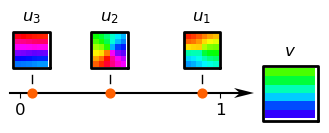

In [8]:
# %% CPCA metric

tmp_affs = core.topomap_affinity(maps[sel_times], map0, True, False)

fx, fy = 3.2, 1.3
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.05 / fx, 0.4 / fy, 2.5 / fx, 0.2 / fy])
tmp_scale = 1.25 / 2.5
plt.axis([-0.05, 1.2, 0, tmp_scale * 0.2])
plt.plot([-0.05, 1.1], [0, 0], lw = 1.5, c = "#000000", clip_on = False)
icons.draw_arrow_head([1.1, 0], [tmp_scale * 0.2, 0], "#000000", tmp_scale * 0.1, 0.3)
plt.scatter(tmp_affs, [0] * 3, s = 40, c = cpca_color, zorder = 10, clip_on = False)
for i in range(3):
    plt.plot([tmp_affs[i]] * 2, [tmp_scale * 0.1, tmp_scale * 0.18], c = "#000000", lw = 1)
ax.set_frame_on(False)
ax.set_xticks([0, 1])
ax.set_yticks([])
ax.tick_params(labelsize = "large")

ax = plt.axes([2.55 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
gsmp.disp_grid_phasemap(grids, gshape, map0)
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])
fig.text(2.85 / fx, 0.75 / fy, "$v$", ha = "center", va = "bottom", size = "large")

for i in range(3):
    tmp_xpos = (tmp_affs[i] + 0.05) / tmp_scale + 0.05
    ax = plt.axes([(tmp_xpos - 0.2) / fx, 0.63 / fy, 0.4 / fx, 0.4 / fy])
    gsmp.disp_grid_phasemap(grids, gshape, maps[sel_times[i]])
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text(tmp_xpos / fx, 1.08 / fy, "$u_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large") 

fig.savefig(fig_path + "cpca_metric_diagram.svg", format = "svg")

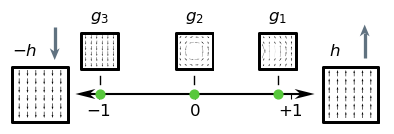

In [9]:
# %% VSVD metric

tmp_grad = np.array([g_fun(mi).reshape([-1]) for mi in maps[sel_times]])
grad0 = g_fun(map0).reshape([-1])
tmp_vsvd = np.zeros([3])
for i in range(3):
    tmp_vsvd[i] = tmp_grad[i].dot(grad0) / (wocca.sqnorm(tmp_grad[i]) * wocca.sqnorm(grad0))

# %% WOCCA metric

tmp_w = np.array([wocca.w(mi, map0) for mi in maps[sel_times]])

fx, fy = 3.8, 1.3
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.7 / fx, 0.4 / fy, 2.4 / fx, 0.2 / fy])
tmp_scale = 2.5 / 2.4
plt.axis([-1.25, 1.25, 0, tmp_scale * 0.2])
plt.plot([-1.1, 1.1], [0, 0], lw = 1.5, c = "#000000", clip_on = False)
icons.draw_arrow_head([1.1, 0], [tmp_scale * 0.2, 0], "#000000", tmp_scale * 0.1, 0.3)
icons.draw_arrow_head([-1.1, 0], [-tmp_scale * 0.2, 0], "#000000", tmp_scale * 0.1, 0.3)
plt.scatter(tmp_vsvd, [0] * 3, s = 40, c = vsvd_color, zorder = 10, clip_on = False)
for i in range(3):
    plt.plot([tmp_vsvd[i]] * 2, [tmp_scale * 0.1, tmp_scale * 0.18], c = "#000000", lw = 1)
ax.set_frame_on(False)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([vis.minus_sign + "1", "0", "+1"])
ax.set_yticks([])
ax.tick_params(labelsize = "large")

ax = plt.axes([0.05 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
gsmp.disp_grid_gradient(grids, grid_adj, np.conj(map0), show_r2 = True, scale = 30, width = 0.01)
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])
fig.text(0.2 / fx, 0.75 / fy, "${}h$".format(vis.minus_sign), ha = "center", va = "bottom", size = "large")
ax = plt.axes([0.3 / fx, 0.72 / fy, (1 / 2.54) / fx, (1 / 2.54) / fy])
plt.axis([-0.5, 0.5, -0.5, 0.5])
icons.longitudinal_bw(default_color, scale = 1 / 2.54)
vis.no_axes(ax)

ax = plt.axes([3.15 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
gsmp.disp_grid_gradient(grids, grid_adj, map0, show_r2 = True, scale = 30, width = 0.01)
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])
fig.text(3.3 / fx, 0.75 / fy, "$h$", ha = "center", va = "bottom", size = "large")
ax = plt.axes([3.4 / fx, 0.72 / fy, (1 / 2.54) / fx, (1 / 2.54) / fy])
plt.axis([-0.5, 0.5, -0.5, 0.5])
icons.longitudinal_fw(default_color, scale = 1 / 2.54)
vis.no_axes(ax)

for i in range(3):
    tmp_xpos = (tmp_vsvd[i] + 1.25) / tmp_scale + 0.7
    ax = plt.axes([(tmp_xpos - 0.2) / fx, 0.63 / fy, 0.4 / fx, 0.4 / fy])
    gsmp.disp_grid_gradient(grids, grid_adj, maps[sel_times[i]], show_r2 = True, scale = 30, width = 0.01)
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text(tmp_xpos / fx, 1.08 / fy, "$g_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large") 

fig.savefig(fig_path + "vsvd_metric_diagram.svg", format = "svg")

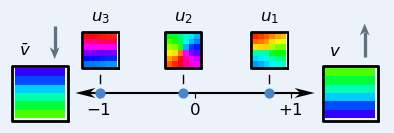

In [10]:
# %% WOCCA metric

tmp_w = np.array([wocca.w(mi, map0) for mi in maps[sel_times]])

fx, fy = 3.8, 1.3
fig = plt.figure(figsize = [fx, fy], facecolor = wocca_shade_color)
ax = plt.axes([0.7 / fx, 0.4 / fy, 2.4 / fx, 0.2 / fy], facecolor = wocca_shade_color)
tmp_scale = 2.5 / 2.4
plt.axis([-1.25, 1.25, 0, tmp_scale * 0.2])
plt.plot([-1.1, 1.1], [0, 0], lw = 1.5, c = "#000000", clip_on = False)
icons.draw_arrow_head([1.1, 0], [tmp_scale * 0.2, 0], "#000000", tmp_scale * 0.1, 0.3)
icons.draw_arrow_head([-1.1, 0], [-tmp_scale * 0.2, 0], "#000000", tmp_scale * 0.1, 0.3)
plt.scatter(tmp_w, [0] * 3, s = 40, c = wocca_color, zorder = 10, clip_on = False)
for i in range(3):
    plt.plot([tmp_w[i]] * 2, [tmp_scale * 0.1, tmp_scale * 0.18], c = "#000000", lw = 1)
ax.set_frame_on(False)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([vis.minus_sign + "1", "0", "+1"])
ax.set_yticks([])
ax.tick_params(labelsize = "large")

ax = plt.axes([0.05 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy], facecolor = wocca_shade_color)
gsmp.disp_grid_phasemap(grids, gshape, np.conj(map0))
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])
fig.text(0.2 / fx, 0.75 / fy, r"$\bar{v}$", ha = "center", va = "bottom", size = "large")
ax = plt.axes([0.3 / fx, 0.72 / fy, (1 / 2.54) / fx, (1 / 2.54) / fy], facecolor = wocca_shade_color)
plt.axis([-0.5, 0.5, -0.5, 0.5])
icons.longitudinal_bw(default_color, scale = 1 / 2.54)
vis.no_axes(ax)

ax = plt.axes([3.15 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy], facecolor = wocca_shade_color)
gsmp.disp_grid_phasemap(grids, gshape, map0)
gsmp.draw_grid_frame()
plt.axis([-0.6, 0.6, -0.6, 0.6])
fig.text(3.3 / fx, 0.75 / fy, "$v$", ha = "center", va = "bottom", size = "large")
ax = plt.axes([3.4 / fx, 0.72 / fy, (1 / 2.54) / fx, (1 / 2.54) / fy], facecolor = wocca_shade_color)
plt.axis([-0.5, 0.5, -0.5, 0.5])
icons.longitudinal_fw(default_color, scale = 1 / 2.54)
vis.no_axes(ax)

for i in range(3):
    tmp_xpos = (tmp_w[i] + 1.25) / tmp_scale + 0.7
    ax = plt.axes([(tmp_xpos - 0.2) / fx, 0.63 / fy, 0.4 / fx, 0.4 / fy], facecolor = wocca_shade_color)
    gsmp.disp_grid_phasemap(grids, gshape, maps[sel_times[i]])
    gsmp.draw_grid_frame()
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    fig.text(tmp_xpos / fx, 1.08 / fy, "$u_{:}$".format(i + 1), ha = "center", va = "bottom", size = "large") 

fig.savefig(fig_path + "wocca_metric_diagram.svg", format = "svg")

### VSVD incapability

In [91]:
tmp_pm = np.zeros([6, n_vec], dtype = complex)
tmp_pm[0] = gsmp.translational(grids, np.array([np.pi / 2]), 2).flatten()
tmp_pm[1] = gsmp.translational(grids, np.array([np.pi / 2]), 1).flatten()
tmp_pm[2] = gsmp.translational(grids, np.array([np.pi / 6]), 1).flatten()
tmp_pm[3] = gsmp.rotational(grids, np.array([[0, 0]]), polarity = 1, wn = 1).flatten()
tmp_pm[4] = gsmp.rotational(grids, np.array([[0, 0]]), polarity = 1, wn = 2).flatten()
tmp_pm[5] = gsmp.rotational(grids, np.array([[-0.25, 0]]), polarity = 1, wn = 2).flatten()

tmp_g = np.zeros([6, n_vec * 2])
for i in range(6):
    tmp_pm[i] /= wocca.sqnorm(tmp_pm[i])
    tmp_g[i] = g_fun(tmp_pm[i]).flatten()

In [92]:
tmp_w = np.zeros([6, 6])
tmp_gr = np.zeros([6, 6])
tmp_gn = np.zeros([6, 6])
for i in range(6):
    for j in range(6):
        tmp_w[i, j] = wocca.w(tmp_pm[i], tmp_pm[j])
        tmp_gr[i, j] = tmp_g[i].dot(tmp_g[j])
        tmp_gn[i, j] = tmp_gr[i, j] / (wocca.sqnorm(tmp_g[i]) * wocca.sqnorm(tmp_g[j]))

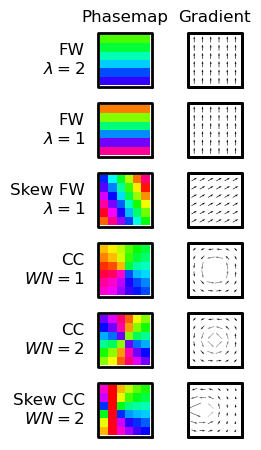

In [112]:
# %% Example phasemaps

fx, fy = 2.5, 4.5
fig = plt.figure(figsize = [fx, fy])
for i in range(6):
    ax = plt.axes([0.9 / fx, (0.1 + 0.7 * (5 - i)) / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_phasemap(grids, gshape, tmp_pm[i])
    gsmp.draw_grid_frame()
    
    ax = plt.axes([1.8 / fx, (0.1 + 0.7 * (5 - i)) / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_gradient(grids, grid_adj, tmp_pm[i], show_r2 = True, scale = [30, 60, 60, 30, 60, 60][i], width = 0.01)
    gsmp.draw_grid_frame()

    fig.text(0.8 / fx, (0.4 + 0.7 * (5 - i)) / fy, \
             ["FW\n$\lambda=2$", "FW\n$\lambda=1$", "Skew FW\n$\lambda=1$", "CC\n$WN=1$", "CC\n$WN=2$", "Skew CC\n$WN=2$"][i], ha = "right", va = "center", size = "large")

fig.text(1.2 / fx, 4.25 / fy, "Phasemap", ha = "center", va = "bottom", size = "large")
fig.text(2.1 / fx, 4.25 / fy, "Gradient", ha = "center", va = "bottom", size = "large")
fig.savefig(fig_supp_path + "vsvd_toy_phasemaps.svg", format = "svg")

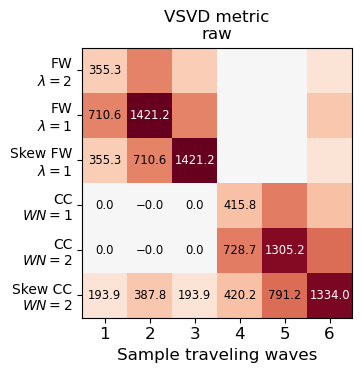

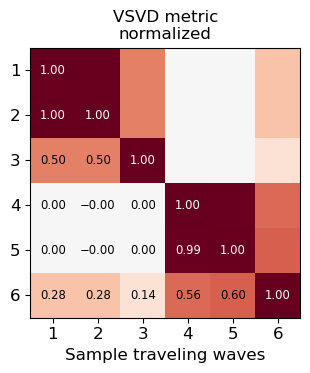

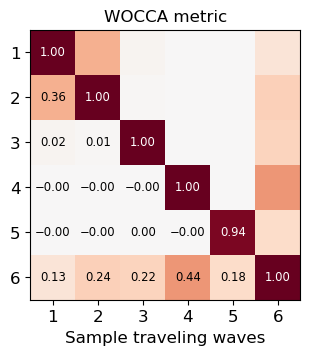

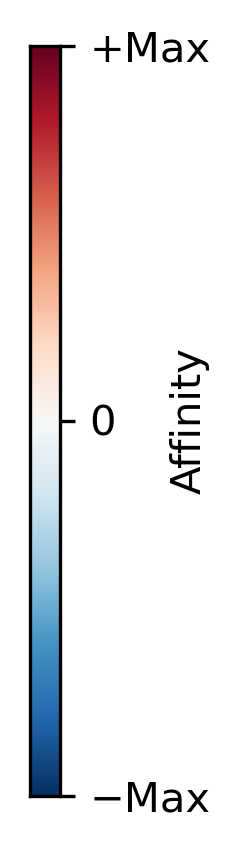

In [128]:
# %% Affinity matrices

for i in range(3):
    tmp_mat = [tmp_gr, tmp_gn, tmp_w][i]
    tmp_str = ["VSVD metric\nraw", "VSVD metric\nnormalized", "WOCCA metric"][i]
    tmp_fn = ["vsvd_r", "vsvd_n", "wocca"][i]
    tmp_vm = 1 if i > 0 else np.abs(tmp_gr).max()
    tmp_format = "{:.2f}" if i > 0 else "{:.1f}"
    fx, fy = (3.3 if i > 0 else 3.7), 3.7
    fig = plt.figure(figsize = [fx, fy])
    ax = plt.axes([(0.5 if i > 0 else 0.9) / fx, 0.5 / fy, 2.7 / fx, 2.7 / fy])
    plt.imshow(tmp_mat, vmin = -tmp_vm, vmax = tmp_vm, cmap = "RdBu_r")
    for j in range(6):
        for k in range(j, 6):
            plt.text(j, k, tmp_format.format(tmp_mat[j, k]).replace("-", vis.minus_sign), ha = "center", va = "center", size = "small", \
                     c = "#000000" if vis.luminance(mpl.colormaps.get_cmap("RdBu_r")(tmp_mat[j, k] / (2 * tmp_vm) + 0.5)) > 0.5 else "#FFFFFF")
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(6))
    ax.set_xticklabels([str(i + 1) for i in range(6)], size = "large")
    if i == 0:
        ax.set_yticklabels(["FW\n$\lambda=2$", "FW\n$\lambda=1$", "Skew FW\n$\lambda=1$", "CC\n$WN=1$", "CC\n$WN=2$", "Skew CC\n$WN=2$"], size = "medium")
    else:
        ax.set_yticklabels([str(i + 1) for i in range(6)], size = "large")
    plt.xlabel("Sample traveling waves", size = "large")
    plt.title(tmp_str)
    fig.savefig(fig_supp_path + "vsvd_metric_" + tmp_fn + ".svg", format = "svg")

# Standalone colorbar
fig = vis.colorbar("RdBu_r", fs = [0.7, 2.7], bs = [0.1, 2.5], ticks = np.array([-1, 0, 1]), vmin = -1, vmax = 1, \
                   tick_labels = [vis.minus_sign + "Max", "0", "+Max"], caption = "Affinity")
fig.savefig(fig_supp_path + "vsvd_metric_colorbar.svg", format = "svg")

### Generate toy dataset

In [6]:
# %% Prepare dataset

n_comps = 10
toy_pickle_fn = toy_pickle_prefix + "dataset.pickle"
if os.path.exists(toy_pickle_fn):
    with open(toy_pickle_fn, mode = "rb") as FIn:
        wavelengths, directions, centers, maps, grads, cpca_comps, vsvd_comps, wocca_comps = pickle.load(FIn)
    print("Load saved data")
else:
    print("Prepare new data")
    
    random_state = np.random.RandomState(seed = 1)
    
    # Wavelength: 0.5 - 3
    wavelengths = random_state.random(size = [4000]) * 2.5 + 0.5
    # Directions
    directions = np.array([random_state.normal(loc = np.pi / 2 + i * np.pi, scale = np.pi / 12, size = 2000) \
                           for i in range(2)]).flatten()
    # Centers
    centers = random_state.normal(scale = 0.1 / np.sqrt(2), size = [2000, 2])
    
    # Generate phasemaps
    maps = np.zeros([6000, 36], dtype = complex)
    for i in range(4000):
        maps[i] = gsmp.translational(grids, directions[i].reshape([1]), wl = wavelengths[i]).flatten()
    maps[4000 : 5000] = gsmp.rotational(grids, centers[ : 1000], polarity = 1)
    maps[5000 : ] = gsmp.rotational(grids, centers[1000 : ], polarity = -1)
    for i in range(6000):
        maps[i] /= wocca.sqnorm(maps[i])
    
    # Get gradients
    grads = np.array([g_fun(v).reshape([-1]) for v in maps])

    # CPCA
    cpca_comps = wocca.cpca(maps)[ : n_comps]
    # VSVD
    u, sv, vh = lin.svd(grads, full_matrices = False)
    vsvd_comps = vh[ : n_comps].reshape([n_comps, -1, 2])
    # WOCCA
    wocca_comps = wocca.wocca(maps, n_components = n_comps + 5, use_torch = True, backtrack = True, backtrack_max_iter = 20)[ : n_comps]
    
    # Save as pickle    
    with open(toy_pickle_fn, mode = "wb") as FOut:
        pickle.dump((wavelengths, directions, centers, maps, grads, cpca_comps, vsvd_comps, wocca_comps), FOut)

Load saved data


In [7]:
# %% Define standard phasemaps

map0 = gsmp.translational(grids, np.array([np.pi / 2]), wl = 2).flatten()
map1 = gsmp.rotational(grids, np.array([[0, 0]]), polarity = 1, wn = 1).flatten()
map2 = gsmp.translational(grids, np.array([np.pi / 2]), wl = 2 / 3).flatten()
map0, map1, map2 = [mi / wocca.sqnorm(mi) for mi in [map0, map1, map2]]
grad0, grad1, grad2 = [g_fun(mi).flatten() for mi in [map0, map1, map2]]

standing_map = np.array(-map0.imag.copy(), dtype = complex)
standing_map = standing_map / wocca.sqnorm(standing_map)

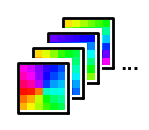

In [834]:
# %% Draw sample phasemaps

fx, fy = 1.5, 1.3
fig = plt.figure(figsize = [fx, fy])
for i in range(4):
    ax = plt.axes([(0.1 + 0.15 * (3 - i)) / fx, (0.1 + 0.15 * (3 - i)) / fy, 0.65 / fx, 0.65 / fy], facecolor = "#FFFFFF")
    plt.axis([-0.65, 0.65, -0.65, 0.65])
    gsmp.disp_grid_phasemap(grids, gshape, maps[[0, 2000, 4000, 5000][i]])
    gsmp.draw_grid_frame()
    rect_bg = mpl.patches.Rectangle([-0.65, -0.65], 1.3, 1.3, \
                                    ec = "#00000000", lw = 0, fc = "#FFFFFF", zorder = -10)
    ax.add_patch(rect_bg)
fig.text(1.2 / fx, 0.65 / fy, "···", ha = "left", va = "center", size = "large", fontweight = "bold")

fig.savefig(fig_path + "toy_dataset_stacked_examples.svg", format = "svg")

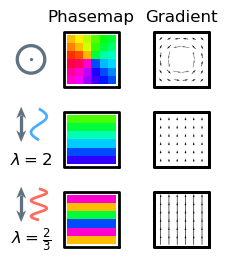

In [835]:
# %% Draw standard examples

fx, fy = 2.2, 2.6
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([0.1 / fx, (0.1 + 0.8 * (2 - i) + (0.6 - 1 / 2.54) / 2 + 0.15 * int(i > 0)) / fy, (1 / 2.54) / fx, (1 / 2.54) / fy])
    plt.axis([-0.5, 0.5, -0.5, 0.5])
    vis.no_axes(ax)
    if i == 0:
        icons.rotation(default_color, default_color, scale = 1 / 2.54)
    else:
        icons.longitudinal_wave(default_color, [long_wave_color, short_wave_color][i - 1], i, scale = 1 / 2.54)
        fig.text((0.1 + 0.5 / 2.54) / fx, (0.2 + 0.8 * (2 - i)) / fy, r"$\lambda=" + ["2", r"\frac{2}{3}"][i - 1] + "$", \
                 ha = "center", va = "center", size = "large")

    ax = plt.axes([0.6 / fx, (0.1 + 0.8 * (2 - i)) / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_phasemap(grids, gshape, [map1, map0, map2][i])
    gsmp.draw_grid_frame()
    
    ax = plt.axes([1.5 / fx, (0.1 + 0.8 * (2 - i)) / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_gradient(grids, grid_adj, [map1, map0, map2][i], show_r2 = True, scale = [30, 60, 60][i], width = 0.01)
    gsmp.draw_grid_frame()

fig.text(0.9 / fx, 2.35 / fy, "Phasemap", ha = "center", va = "bottom", size = "large")
fig.text(1.8 / fx, 2.35 / fy, "Gradient", ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_standard_maps.svg", format = "svg")

/tmp/ipykernel_2337512/672993125.py:6: RuntimeWarning: divide by zero encountered in log
  tmp_h1 = np.log(tmp_h0) + 1


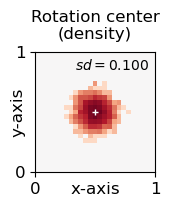

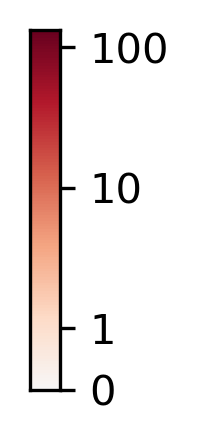

In [18]:
# %% Rotation center histogram

# Compute histogram
tmp_h, tmp_x, tmp_y = np.histogram2d(centers[ : , 0], centers[ : , 1], bins = 25, range = [[-0.5, 0.5], [-0.5, 0.5]])
tmp_h0 = tmp_h / (len(centers) / (50 ** 2))
tmp_h1 = np.log(tmp_h0) + 1
tmp_h1[tmp_h0 == 0] = 0
vmax = tmp_h1.max()
hmax = tmp_h0.max()

sd = np.sqrt((centers ** 2).sum(axis = 1).mean())

# Draw
fx, fy = 1.6, 2
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.3 / fx, 0.3 / fy, 1.2 / fx, 1.2 / fy])
plt.pcolormesh(tmp_x, tmp_y, tmp_h1, shading = "flat", cmap = "RdBu_r", vmin = -vmax, vmax = vmax)
plt.scatter(0, 0, s = 30, marker = "+", linewidth = 1, c = "#FFFFFF", zorder = 10)
ax.tick_params(labelsize = "large")
ax.set_xticks([-0.5, 0.5])
ax.set_xticklabels(["0", "1"])
ax.set_yticks([-0.5, 0.5])
ax.set_yticklabels(["0", "1"])
plt.text(0.45, 0.45, "$sd={:.3f}$".format(sd), ha = "right", va = "top", size = "medium")
fig.text(0.05 / fx, 0.9 / fy, "y-axis", ha = "left", va = "center", size = "large", rotation = 90)
fig.text(0.9 / fx, 0.05 / fy, "x-axis", ha = "center", va = "bottom", size = "large")
fig.text(0.9 / fx, 1.6 / fy, "Rotation center\n(density)", ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_rotation_centers.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.55, 1.4], bs = [0.1, 1.2], ticks = np.array([0, 1, np.log(10) + 1, np.log(100) + 1]), vmin = -vmax, vmax = vmax, \
                   clip = [0, vmax], tick_labels = ["0", "1", "10", "100"], caption = "")
fig.savefig(fig_path + "toy_dataset_rotation_centers_colorbar.svg", format = "svg")

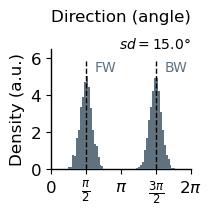

In [837]:
# %% Direction histogram

# Compute histogram
tmp_h, tmp_x = np.histogram(directions, bins = 72, range = [0, np.pi * 2])
tmp_h0 = tmp_h / (len(directions) / 72)
vmax = tmp_h.max()

sd = np.sqrt(np.array([(directions - np.pi / 2) ** 2, (directions - np.pi * 3 / 2) ** 2]).min(axis = 0).mean()) / np.pi * 180

# Draw
fx, fy = 2.1, 2.1
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.5 / fx, 0.4 / fy, 1.4 / fx, 1.2 / fy])
plt.axis([0, np.pi * 2, 0, 6.5])
for i in range(len(tmp_h0)):
    plt.bar(tmp_x[i] + np.pi * 2 / 144, tmp_h0[i], np.pi * 2 / 72, color = default_color)
plt.axvline(x = np.pi / 2, ymax = 0.9, lw = 1, ls = "--", c = "#000000", zorder = 10)
plt.text(np.pi / 2 + np.pi / 8, 5.5, "FW", ha = "left", va = "center", size = "medium", color = default_color)
plt.axvline(x = np.pi * 3 / 2, ymax = 0.9, lw = 1, ls = "--", c = "#000000", zorder = 10)
plt.text(np.pi * 3 / 2 + np.pi / 8, 5.5, "BW", ha = "left", va = "center", size = "medium", color = default_color)
ax.tick_params(labelsize = "large")
ax.set_xticks([0, np.pi / 2, np.pi, np.pi * 3 / 2, np.pi * 2])
ax.set_xticklabels(["$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_yticks([0, 2, 4, 6])
vis.lower_left(ax)
plt.ylabel("Density (a.u.)", size = "large")
plt.text(np.pi * 2, 7.2, r"$sd={:.1f}\degree$".format(sd), ha = "right", va = "top", size = "medium", clip_on = False)
fig.text(1.2 / fx, 1.85 / fy, "Direction (angle)", ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_directions.svg", format = "svg")

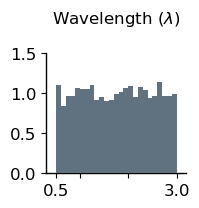

In [838]:
# %% Wavelength histogram

# Compute histogram
tmp_h, tmp_x = np.histogram(wavelengths, bins = 25, range = [0.5, 3])
tmp_h0 = tmp_h / (len(wavelengths) / 25)
vmax = tmp_h.max()

# Draw
fx, fy = 1.9, 2.1
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.4 / fx, 0.4 / fy, 1.4 / fx, 1.2 / fy])
plt.axis([0.3, 3.2, 0, 1.5])
for i in range(len(tmp_h0)):
    plt.bar(tmp_x[i] + 0.05, tmp_h0[i], 0.1, color = default_color)
ax.tick_params(labelsize = "large")
ax.set_xticks([0.5, 1, 2, 3])
ax.set_xticklabels(["0.5", "", "", "3.0"])
ax.set_yticks([0, 0.5, 1, 1.5])
vis.lower_left(ax)
fig.text(1.1 / fx, 1.85 / fy, r"Wavelength ($\lambda$)", ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_wavelengths.svg", format = "svg")

### Evaluate decomposition results

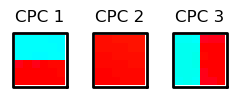

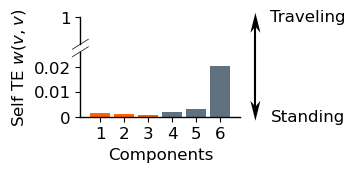

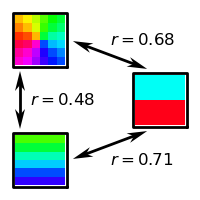

In [845]:
# %% CPCA

# Components
fx, fy = 2.4, 1
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([(0.1 + 0.8 * i) / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_phasemap(grids, gshape, cpca_comps[i])
    gsmp.draw_grid_frame()
    fig.text((0.4 + 0.8 * i) / fx, 0.75 / fy, "CPC {:}".format(i + 1), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_cpca_comps.svg", format = "svg")

# Traveling energy bars
tmp_tes = np.array([wocca.w(ci, ci) for ci in cpca_comps[ : 6]])

fx, fy = 3.5, 1.65
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.8 / fx, 0.5 / fy, 1.6 / fx, 1 / fy])
plt.axis([0, 1.6, 0, 0.02])
for i in range(6):
    plt.bar(0.2 + 0.24 * i, tmp_tes[i], 0.2, color = cpca_color if i < 3 else default_color)
ax.tick_params(labelsize = "large")
ax.set_frame_on(False)
ax.set_xticks(0.2 + 0.24 * np.arange(6))
ax.set_xticklabels([str(i + 1) for i in range(6)])
ax.set_yticks([0, 0.01, 0.02, 0.04])
ax.set_yticklabels(["0", "0.01", "0.02", "1"])
plt.axvline(x = 0, ymax = 0.026 / 0.04, lw = 1, c = "#000000", clip_on = False)
plt.axvline(x = 0, ymin = 0.029 / 0.04, lw = 1, c = "#000000", clip_on = False)
plt.axhline(y = 0, lw = 1, c = "#000000", clip_on = False)
plt.plot([-0.08, 0.08], [0.026 - 0.002, 0.026 + 0.002], lw = 0.5, c = "#000000", clip_on = False)
plt.plot([-0.08, 0.08], [0.029 - 0.002, 0.029 + 0.002], lw = 0.5, c = "#000000", clip_on = False)
plt.xlabel("Components", size = "large")
plt.ylabel("Self TE $w(v,v)$", size = "large")

ax = plt.axes([2.45 / fx, 0.5 / fy, 0.2 / fx, 1 / fy])
plt.axis([0, 0.2, 0, 1])
vis.no_axes(ax)
plt.plot([0.1, 0.1], [0.1, 0.9], lw = 1.5, c = "#000000", clip_on = False)
icons.draw_arrow_head([0.1, 0.9], [0, 0.2], "#000000", 0.1, 0.3)
icons.draw_arrow_head([0.1, 0.1], [0, -0.2], "#000000", 0.1, 0.3)
fig.text(2.7 / fx, 1.5 / fy, "Traveling", ha = "left", va = "center", size = "large")
fig.text(2.7 / fx, 0.5 / fy, "Standing", ha = "left", va = "center", size = "large")

fig.savefig(fig_path + "toy_dataset_cpca_te.svg", format = "svg")

# Examples of orthogonality

fx, fy = 2, 2
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.1 / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
plt.axis([-0.6, 0.6, -0.6, 0.6])
gsmp.disp_grid_phasemap(grids, gshape, map0)
gsmp.draw_grid_frame()

ax = plt.axes([0.1 / fx, 1.3 / fy, 0.6 / fx, 0.6 / fy])
plt.axis([-0.6, 0.6, -0.6, 0.6])
gsmp.disp_grid_phasemap(grids, gshape, map1)
gsmp.draw_grid_frame()

ax = plt.axes([1.3 / fx, 0.7 / fy, 0.6 / fx, 0.6 / fy])
plt.axis([-0.6, 0.6, -0.6, 0.6])
gsmp.disp_grid_phasemap(grids, gshape, standing_map)
gsmp.draw_grid_frame()

tmp_aff = core.topomap_affinity(map0, map1, True, False)
ax = plt.axes([0.1 / fx, 0.7 / fy, 0.2 / fx, 0.6 / fy])
plt.axis([0, 0.2, 0, 0.6])
vis.no_axes(ax)
plt.plot([0.1, 0.1], [0.15, 0.45], lw = 2, c = "#000000")
icons.draw_arrow_head([0.1, 0.15], [0, -0.2], "#000000", 0.1, 0.3)
icons.draw_arrow_head([0.1, 0.45], [0, 0.2], "#000000", 0.1, 0.3)
fig.text(0.3 / fx, 1 / fy, "$r={:.2f}$".format(tmp_aff), ha = "left", va = "center", size = "large")

tmp_aff = core.topomap_affinity(map1, standing_map, True, False)
tmp_norm = 0.2 / np.sqrt(8 ** 2 + 3 ** 2)
ax = plt.axes([0.7 / fx, 1.3 / fy, 0.8 / fx, 0.3 / fy])
plt.axis([0, 0.8, 0, 0.3])
vis.no_axes(ax)
plt.plot([0.16, 0.64], [0.24, 0.06], lw = 2, c = "#000000")
icons.draw_arrow_head([0.16, 0.24], [-8 * tmp_norm, 3 * tmp_norm], "#000000", 0.1, 0.3)
icons.draw_arrow_head([0.64, 0.06], [8 * tmp_norm, -3 * tmp_norm], "#000000", 0.1, 0.3)
fig.text(1.1 / fx, 1.6 / fy, "$r={:.2f}$".format(tmp_aff), ha = "left", va = "center", size = "large")

tmp_aff = core.topomap_affinity(map0, standing_map, True, False)
tmp_norm = 0.2 / np.sqrt(8 ** 2 + 3 ** 2)
ax = plt.axes([0.7 / fx, 0.4 / fy, 0.8 / fx, 0.3 / fy])
plt.axis([0, 0.8, 0, 0.3])
vis.no_axes(ax)
plt.plot([0.16, 0.64], [0.06, 0.24], lw = 2, c = "#000000")
icons.draw_arrow_head([0.16, 0.06], [-8 * tmp_norm, -3 * tmp_norm], "#000000", 0.1, 0.3)
icons.draw_arrow_head([0.64, 0.24], [8 * tmp_norm, 3 * tmp_norm], "#000000", 0.1, 0.3)
fig.text(1.1 / fx, 0.4 / fy, "$r={:.2f}$".format(tmp_aff), ha = "left", va = "center", size = "large")

fig.savefig(fig_path + "toy_dataset_cpca_affinity.svg", format = "svg")

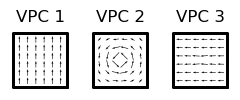

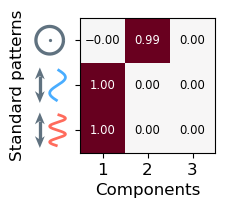

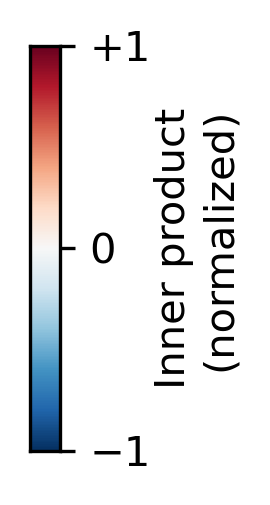

In [840]:
# %% VSVD

# Components
fx, fy = 2.4, 1
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([(0.1 + 0.8 * i) / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_quiver_map(grids, grid_adj, vsvd_comps[i], scale = 1.5, width = 0.01)
    gsmp.draw_grid_frame()
    fig.text((0.4 + 0.8 * i) / fx, 0.75 / fy, "VPC {:}".format(i + 1), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_vsvd_comps.svg", format = "svg")

# Normalized inner product
tmp_affs = np.zeros([3, 3])
for i in range(3):
    mi = [grad1, grad0, grad2][i]
    for j in range(3):
        mj = vsvd_comps[j].flatten()
        tmp_affs[i, j] = (mi * mj).sum() / np.sqrt((mi ** 2).sum() * (mj ** 2).sum())

fx, fy = 2.2, 1.95
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.8 / fx, 0.5 / fy, 1.35 / fx, 1.35 / fy])
plt.imshow(tmp_affs, cmap = "RdBu_r", vmin = -1, vmax = 1)
for i in range(3):
    for j in range(3):
        plt.text(j, i, "{:.2f}".format(tmp_affs[i, j]).replace("-", vis.minus_sign), ha = "center", va = "center", size = "small", \
                 c = "#000000" if vis.luminance(mpl.colormaps.get_cmap("RdBu_r")((tmp_affs[i, j] + 1) / 2)) > 0.5 else "#FFFFFF")
ax.tick_params(labelsize = "large")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["1", "2", "3"])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels([""] * 3)
plt.xlabel("Components", size = "large")
fig.text(0.1 / fx, (0.5 + 0.45 * 1.5) / fy, "Standard patterns", ha = "left", va = "center", size = "large", rotation = 90)
for i in range(3):
    ax = plt.axes([0.3 / fx, (0.5 + 0.45 * (2 - i) + (0.45 - 1 / 2.54) / 2) / fy, (1 / 2.54) / fx, (1 / 2.54) / fy])
    plt.axis([-0.5, 0.5, -0.5, 0.5])
    vis.no_axes(ax)
    if i == 0:
        icons.rotation(default_color, default_color, scale = 1 / 2.54)
    else:
        icons.longitudinal_wave(default_color, [long_wave_color, short_wave_color][i - 1], i, scale = 1 / 2.54)

fig.savefig(fig_path + "toy_dataset_vsvd_inner_product.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.8, 1.55], bs = [0.1, 1.35], ticks = np.array([-1, 0, 1]), vmin = -1, vmax = 1, \
                   tick_labels = [vis.minus_sign + "1", "0", "+1"], caption = "Inner product\n(normalized)")
fig.savefig(fig_path + "toy_dataset_vsvd_inner_product_colorbar.svg", format = "svg")

[ 1.89224448e+00 -1.10898915e+03  9.59437405e-01]


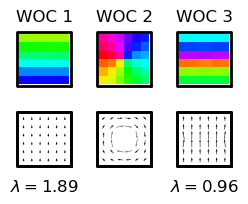

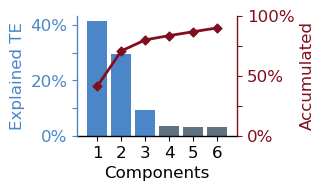

In [8]:
# %% WOCCA

# Compute mean wavelengths
wocca_wl = np.zeros([3])
for i in range(3):
    tmp_angv = 0
    for j in range(6):
        tmp_angv -= np.diff(np.unwrap(np.angle(wocca_comps[i, j * 6 : (j + 1) * 6]))).mean() * 6
    wocca_wl[i] = 2 * np.pi * 6 / tmp_angv
print(wocca_wl)

# Components
fx, fy = 2.4, 2
fig = plt.figure(figsize = [fx, fy])
for i in range(3):
    ax = plt.axes([(0.1 + 0.8 * i) / fx, 1.1 / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_phasemap(grids, gshape, wocca_comps[i])
    gsmp.draw_grid_frame()
    ax = plt.axes([(0.1 + 0.8 * i) / fx, 0.3 / fy, 0.6 / fx, 0.6 / fy])
    plt.axis([-0.6, 0.6, -0.6, 0.6])
    gsmp.disp_grid_gradient(grids, grid_adj, wocca_comps[i], show_r2 = True, scale = [60, 30, 60][i], width = 0.01)
    gsmp.draw_grid_frame()
    fig.text((0.4 + 0.8 * i) / fx, 1.75 / fy, "WOC {:}".format(i + 1), ha = "center", va = "bottom", size = "large")
fig.text(0.4 / fx, 0.05 / fy, r"$\lambda={:.2f}$".format(wocca_wl[0]), ha = "center", va = "bottom", size = "large")
fig.text(2 / fx, 0.05 / fy, r"$\lambda={:.2f}$".format(wocca_wl[2]), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "toy_dataset_wocca_comps.svg", format = "svg")

# Explained traveling energy
wocca_scores = wocca.score(maps, wocca_comps) / wocca.total_energy(maps)

fig, ax, ax2 = vis.draw_scree_plot(wocca_scores[ : 6], dpi = 100, xps = [0.8, 0.1, 0.2, 0.04, 0.85], yps = [0.3, 0.2, 1.2, 0.1], \
                                   text = False, xlabel = "Components", classes = np.array([0, 0, 0, 1, 1, 1]), class_colors = [wocca_color, default_color], \
                                   yaxis_color = wocca_color, acc_color = scree_accumulated_color)
ax.set_yticks(np.arange(5) * 0.1)
ax.set_yticklabels([r"0%", "", r"20%", "", r"40%"])
ax2.axis(ymax = 1)
ax2.set_yticks(np.arange(5) * 0.25)
ax2.set_yticklabels([r"0%", "", r"50%", "", r"100%"])

fig.savefig(fig_path + "toy_dataset_wocca_scree.svg", format = "svg")

In [10]:
np.cumsum(wocca_scores)

array([0.41283888, 0.70626949, 0.79873496, 0.83438792, 0.86680934,
       0.89862268, 0.91329823, 0.92223758, 0.93039672, 0.93829835])

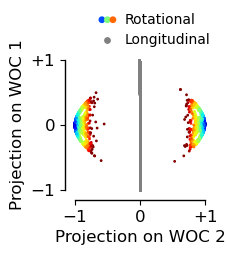

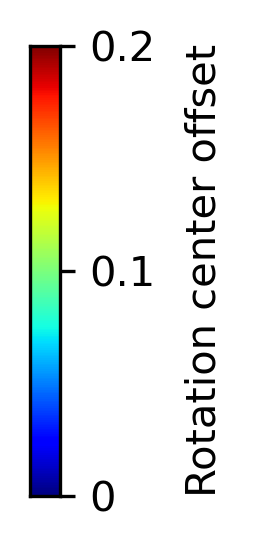

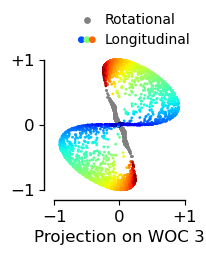

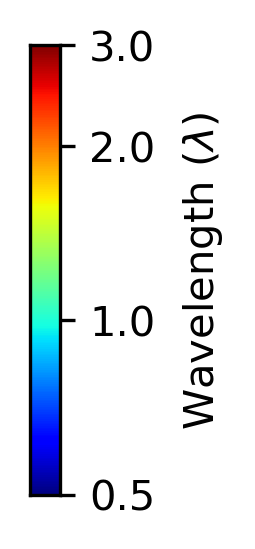

In [13]:
# %% WOCCA components explaining wave types and wavelengths

tmp_projs = wocca.projection(maps, wocca_comps[ : 3])

# Discriminating rotations
fx, fy = 2.3, 2.5
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.7 / fx, 0.5 / fy, 1.5 / fx, 1.5 / fy])
plt.axis([-1.15, 1.15, -1.15, 1.15])
plt.scatter(tmp_projs[ : 4000, 1], tmp_projs[ : 4000, 0], s = 1, c = ignore_color, alpha = 1)
plt.scatter(tmp_projs[4000 : , 1], tmp_projs[4000 : , 0], s = 1, c = np.sqrt((centers ** 2).sum(axis = 1)), cmap = "jet", vmin = 0, vmax = 0.2, alpha = 1)
ax.tick_params(labelsize = "large")
ax.set_frame_on(False)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([vis.minus_sign + "1", "0", "+1"])
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels([vis.minus_sign + "1", "0", "+1"])
plt.plot([-1, 1], [-1.15, -1.15], lw = 1, c = "#000000", clip_on = False)
plt.plot([-1.15, -1.15], [-1, 1], lw = 1, c = "#000000", clip_on = False)
plt.xlabel("Projection on WOC 2", size = "large")
plt.ylabel("Projection on WOC 1", size = "large")

ax = plt.axes([1 / fx, 2 / fy, 1.2 / fx, 0.4 / fy])
vis.no_axes(ax)
plt.axis([0, 1.2, 0, 0.4])
plt.scatter([0.07, 0.125, 0.18], [0.3] * 3, s = 15, c = [0.2, 0.5, 0.8], cmap = "jet", vmin = 0, vmax = 1)
plt.text(0.3, 0.3, "Rotational", ha = "left", va = "center", size = "medium")
plt.scatter([0.125], [0.1], s = 15, c = ignore_color)
plt.text(0.3, 0.1, "Longitudinal", ha = "left", va = "center", size = "medium")

fig.savefig(fig_path + "toy_dataset_wocca_rotation_scatter.svg", format = "svg")

# Rotations colorbar
fig = vis.colorbar("jet", fs = [0.75, 1.7], bs = [0.1, 1.5], ticks = np.array([0, 0.1, 0.2]), vmin = 0, vmax = 0.2, \
                   tick_labels = ["0", "0.1", "0.2"], caption = "Rotation center offset")
fig.savefig(fig_path + "toy_dataset_wocca_rotation_scatter_colorbar.svg", format = "svg")

# Discriminating wavelengths
fx, fy = 2, 2.5
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.4 / fx, 0.5 / fy, 1.5 / fx, 1.5 / fy])
plt.axis([-1.15, 1.15, -1.15, 1.15])
plt.scatter(tmp_projs[4000 : , 2], tmp_projs[4000 : , 0], s = 1, c = ignore_color, alpha = 1)
plt.scatter(tmp_projs[ : 4000, 2], tmp_projs[ : 4000, 0], s = 1, c = np.log(wavelengths), cmap = "jet", vmin = np.log(0.5), vmax = np.log(3), alpha = 1)
ax.tick_params(labelsize = "large")
ax.set_frame_on(False)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([vis.minus_sign + "1", "0", "+1"])
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels([vis.minus_sign + "1", "0", "+1"])
plt.plot([-1, 1], [-1.15, -1.15], lw = 1, c = "#000000", clip_on = False)
plt.plot([-1.15, -1.15], [-1, 1], lw = 1, c = "#000000", clip_on = False)
plt.xlabel("Projection on WOC 3", size = "large")

ax = plt.axes([0.7 / fx, 2 / fy, 1.2 / fx, 0.4 / fy])
vis.no_axes(ax)
plt.axis([0, 1.2, 0, 0.4])
plt.scatter([0.125], [0.3], s = 15, c = ignore_color)
plt.text(0.3, 0.3, "Rotational", ha = "left", va = "center", size = "medium")
plt.scatter([0.07, 0.125, 0.18], [0.1] * 3, s = 15, c = [0.2, 0.5, 0.8], cmap = "jet", vmin = 0, vmax = 1)
plt.text(0.3, 0.1, "Longitudinal", ha = "left", va = "center", size = "medium")

fig.savefig(fig_path + "toy_dataset_wocca_wavelength_scatter.svg", format = "svg")

# Rotations colorbar
fig = vis.colorbar("jet", fs = [0.75, 1.7], bs = [0.1, 1.5], ticks = np.log(np.array([0.5, 1, 2, 3])), vmin = np.log(0.5), vmax = np.log(3), \
                   tick_labels = ["0.5", "1.0", "2.0", "3.0"], caption = r"Wavelength ($\lambda$)")
fig.savefig(fig_path + "toy_dataset_wocca_wavelength_scatter_colorbar.svg", format = "svg")

### Comparing pre-reduction efficiency

In [7]:
# %% New larger dataset

n_grid_l = 8
n_vec_l, grids_l, gshape_l, grid_adj_l, g_fun_l = gsmp.set_grids(n_grid_l)

random_seed = 1
tmp_n_batch = 5000

# Randomly generate dataset
random_state = np.random.RandomState(random_seed)
bv3 = []
bv3.append(gsmp.randomize_batch_translational(tmp_n_batch, grids_l, random_state = random_state, \
                                              dir_mean = np.pi / 2, dir_std = np.pi / 6, wl = 2))
bv3.append(gsmp.randomize_batch_translational(tmp_n_batch, grids_l, random_state = random_state, \
                                              dir_mean = -np.pi / 2, dir_std = np.pi / 6, wl = 2))
bv3.append(gsmp.randomize_batch_rotational(tmp_n_batch, grids_l, random_state = random_state, \
                                           c_mean = [0, 0], c_std = 0.1, polarity = 1, wn = 1))
bv3.append(gsmp.randomize_batch_rotational(tmp_n_batch, grids_l, random_state = random_state, \
                                           c_mean = [0, 0], c_std = 0.1, polarity = -1, wn = 1))
bv3 = np.concatenate(bv3)
bv3 = np.array([vi / np.sqrt(wocca.norm(vi)) for vi in bv3])

tmp_n_dim = 30
tmp_n_comps = 5

# Calculate b matrix directly
time_direct = []
t0 = time.time()
tmp_b = wocca.get_b_matrix(bv3, wocca.upper_triangle(n_vec_l), use_torch = True)
time_direct.append(time.time() - t0)
t0 = time.time()
wc_b3 = wocca.wocca(None, b = tmp_b, n_components = tmp_n_comps, use_torch = True, backtrack = True)
time_direct.append(time.time() - t0)

# Calculate b matrix with pre-reduction
time_reduce = []
t0 = time.time()
bv3_reduce, basis = wocca.pca_decomp(bv3, tmp_n_dim)
time_reduce.append(time.time() - t0)
t0 = time.time()
tmp_b_reduce = wocca.get_b_matrix(bv3_reduce, wocca.upper_triangle(tmp_n_dim), use_torch = True)
time_reduce.append(time.time() - t0)
t0 = time.time()
wc_b3_reduce = wocca.wocca(None, b = tmp_b_reduce, n_components = tmp_n_comps, use_torch = True, backtrack = True)
time_reduce.append(time.time() - t0)
t0 = time.time()
wc_b3_recover = wocca.pca_recover(wc_b3_reduce, basis)
time_reduce.append(time.time() - t0)

print("Without pre-reduction: {:.3f}".format(np.sum(time_direct)))
print("With pre-reduction: {:.3f}".format(np.sum(time_reduce)))

Using GPU: True
Iter 1 / 5
No. of iters 61
Score 7824.750425326862 

Iter 2 / 5
No. of iters 22
Score 7574.9236660278875 

Iter 3 / 5
No. of iters 30
Score 2343.8307428328703 

Iter 4 / 5
No. of iters 38
Score 611.3555163268963 

Iter 5 / 5
No. of iters 36
Score 338.3809976540091 

Using GPU: True
Iter 1 / 5
No. of iters 37
Score 7824.740312366881 

Iter 2 / 5
No. of iters 22
Score 7574.906990365061 



/home/liyichao/miniconda3/envs/mne/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Iter 3 / 5
No. of iters 29
Score 2343.7982494207276 

Iter 4 / 5
No. of iters 40
Score 611.3231665470835 

Iter 5 / 5
No. of iters 40
Score 338.33054765483075 

Without pre-reduction: 17.174
With pre-reduction: 6.213


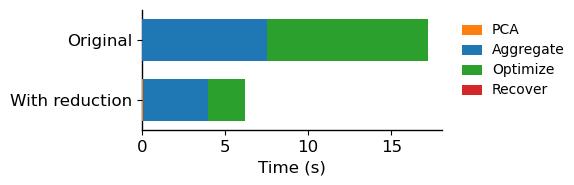

In [8]:
# %% Horizontal bar for time distribution

fx, fy = 5.7, 1.8
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([1.4 / fx, 0.5 / fy, 3 / fx, 1.2 / fy])
plt.axis(ymin = 0, ymax = 2)
for i in range(2):
    tmp_left = np.sum(time_direct[ : i])
    plt.barh(1.5, time_direct[i], 0.7, left = tmp_left, color = vis.colors[[0, 2][i]], lw = 0)
for i in range(4):
    tmp_left = np.sum(time_reduce[ : i])
    plt.barh(0.5, time_reduce[i], 0.7, left = tmp_left, color = vis.colors[[1, 0, 2, 3][i]], lw = 0)
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(["With reduction", "Original"])
ax.tick_params(labelsize = "large")
vis.lower_left(ax)
plt.xlabel("Time (s)", size = "large")

ax = plt.axes([4.5 / fx, 0.8 / fy, 1.1 / fx, 0.8 / fy])
plt.axis([0, 1.1, 0, 0.8])
for i in range(4):
    rect = mpl.patches.Rectangle([0.1, (3 - i) * 0.2 + 0.05], 0.2, 0.1, lw = 0, ec = "#00000000", fc = vis.colors[[1, 0, 2, 3][i]])
    ax.add_patch(rect)
    plt.text(0.4, (3 - i) * 0.2 + 0.1, ["PCA", "Aggregate", "Optimize", "Recover"][i], ha = "left", va = "center", size = "medium")
vis.no_axes(ax)
fig.savefig(fig_supp_path + "wocca_efficiency_bar.svg", format = "svg")

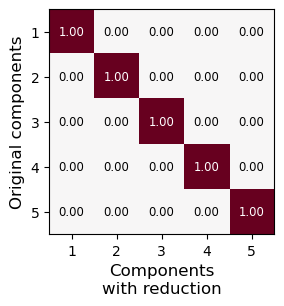

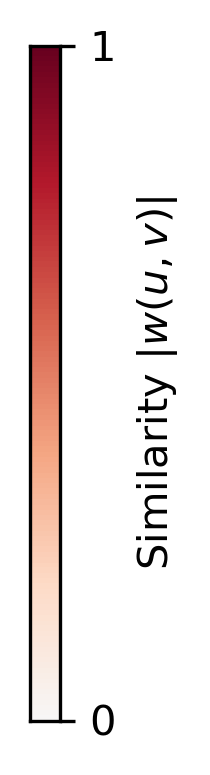

In [9]:
# %% Similarity matrix

tmp_w = np.zeros([tmp_n_comps] * 2)
for i in range(tmp_n_comps):
    for j in range(tmp_n_comps):
        tmp_w[i, j] = wocca.w(wc_b3[i], wc_b3_recover[j])

fx, fy = 3, 3
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.7 / fx, 0.7 / fy, 2.25 / fx, 2.25 / fy])
plt.imshow(np.abs(tmp_w), cmap = "RdBu_r", vmin = -1, vmax = 1)
for i in range(tmp_n_comps):
    for j in range(tmp_n_comps):
        plt.text(j, i, "{:.2f}".format(np.abs(tmp_w[i, j])), ha = "center", va = "center", size = "small", \
                 c = "#000000" if vis.luminance(mpl.colormaps.get_cmap("RdBu_r")(tmp_w[i, j] / 2 + 0.5)) > 0.5 else "#FFFFFF")
ax.set_xticks(np.arange(5))
ax.set_xticklabels([str(i + 1) for i in range(5)])
ax.set_yticks(np.arange(5))
ax.set_yticklabels([str(i + 1) for i in range(5)])
plt.xlabel("Components\nwith reduction", size = "large")
plt.ylabel("Original components", size = "large")
fig.savefig(fig_supp_path + "wocca_efficiency_sim.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.6, 2.45], bs = [0.1, 2.25], ticks = [0, 1], clip = [0, 1], vmin = -1, vmax = 1, caption = "Similarity $|w(u,v)|$")
fig.savefig(fig_supp_path + "wocca_efficiency_sim_colorbar.svg", format = "svg")